In [ ]:
import pandas as pd
import pickle
import numpy as np

In [ ]:
Psy =pd.read_csv('/content/Youtube01-Psy.csv')
Katy =pd.read_csv('/content/Youtube02-KatyPerry.csv')
LMFAO =pd.read_csv('/content/Youtube03-LMFAO.csv')
Eminem =pd.read_csv('/content/Youtube04-Eminem.csv')
Shakira =pd.read_csv('/content/Youtube05-Shakira.csv')

In [ ]:
df = pd.concat([Psy, Katy, LMFAO, Eminem, Shakira])

In [ ]:
df.sample(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
294,_2viQ_Qnc69AVbPU2gXuoLiAOr6muFqsr7sm17CjhX4,Maika Kate Mish Linn,2013-08-31T08:56:12.507000,:) I&#39;ll subscribe to you. You look Nice :),1
392,z130drwgasjgevh0n234ht3gfrmugfguz,Guren - MKII,2014-10-01T19:53:07.387000,everyday i&#39;m subscribe﻿,1
224,z12fzrxbvl3xjlmyi04chleb0uexczkjquk0k,FreexGaming,2014-10-18T08:12:26,want to win borderlands the pre-sequel? check ...,1
104,z13dsnfaozyyil4m322jijgx5m3aehem2,Emerson Zanol Zanol,2014-11-04T13:48:04,need money?Enjoy https://www.tsu.co/emerson_za...,1
144,z13osluqrpefv1hd323idhejzxanc3ai004,Tyrek Sings,2014-11-05T22:50:02,CHECK MY CHANNEL OUT PLEASE. I DO SINGING COVERS﻿,1


In [ ]:
df.shape

(1956, 5)

In [ ]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building 
# 5. Evalution
# 6. Improvement
# 7. website
# 8. Deploy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 0 to 369
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 91.7+ KB


In [ ]:
df=df.drop(columns=['COMMENT_ID','DATE','AUTHOR'])

In [ ]:
#ham-0
#spam-1
df.sample(5)

,CONTENT,CLASS
277,"Hey, join me on tsū, a publishing platform whe...",1
433,"This song is like an oreo, the black part is g...",0
56,"I love this song, it´s for empowering every wo...",0
28,"You exactly who u want to be,watching your fav...",0
21,katy perry will u sit on my face please. it wo...,1


In [ ]:
# no any null value is there
df.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
# dulicate values
df.duplicated().sum()

196

In [ ]:
# remove the duplicates
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1760, 2)

2. EDA

In [ ]:
df.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [ ]:
df['CLASS'].value_counts()

0    919
1    841
Name: CLASS, dtype: int64

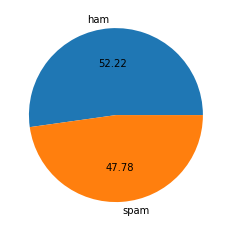

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['CLASS'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_char']=df['CONTENT'].apply(len)

In [ ]:
df.head()

,CONTENT,CLASS,num_char
0,"Huh, anyway check out this you[tube] channel: ...",1,56
1,Hey guys check out my new channel and our firs...,1,166
2,just for test I have to say murdev.com,1,38
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39


In [ ]:
#no. of words
df['num_word']=df['CONTENT'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,CONTENT,CLASS,num_char,num_word
0,"Huh, anyway check out this you[tube] channel: ...",1,56,13
1,Hey guys check out my new channel and our firs...,1,166,40
2,just for test I have to say murdev.com,1,38,8
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,11
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,7


In [ ]:
df['num_sent']=df['CONTENT'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,CONTENT,CLASS,num_char,num_word,num_sent
0,"Huh, anyway check out this you[tube] channel: ...",1,56,13,1
1,Hey guys check out my new channel and our firs...,1,166,40,3
2,just for test I have to say murdev.com,1,38,8,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,11,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,7,1


In [ ]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,1760.000000,1760.000000,1760.000000
mean,96.335795,21.327841,1.833523
std,126.960466,32.116950,2.136105
min,2.000000,1.000000,1.000000
25%,28.000000,6.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,103.000000,22.000000,2.000000
max,1200.000000,697.000000,25.000000


In [ ]:
df[df['CLASS']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,841.000000,841.000000,841.000000
mean,146.092747,31.147444,2.326992
std,159.617500,41.606314,2.864619
min,10.000000,1.000000,1.000000
25%,43.000000,8.000000,1.000000
50%,78.000000,16.000000,1.000000
75%,192.000000,40.000000,2.000000
max,1200.000000,697.000000,25.000000


In [ ]:
import seaborn as sns

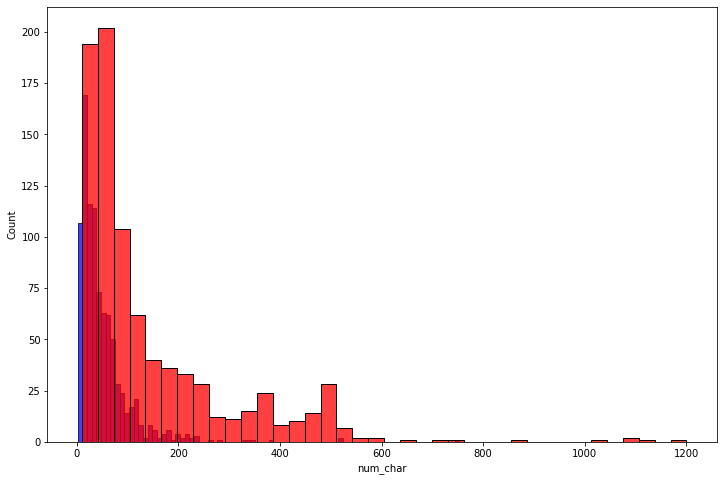

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['CLASS']==0]['num_char'],color='blue')
sns.histplot(df[df['CLASS']==1]['num_char'],color='red')

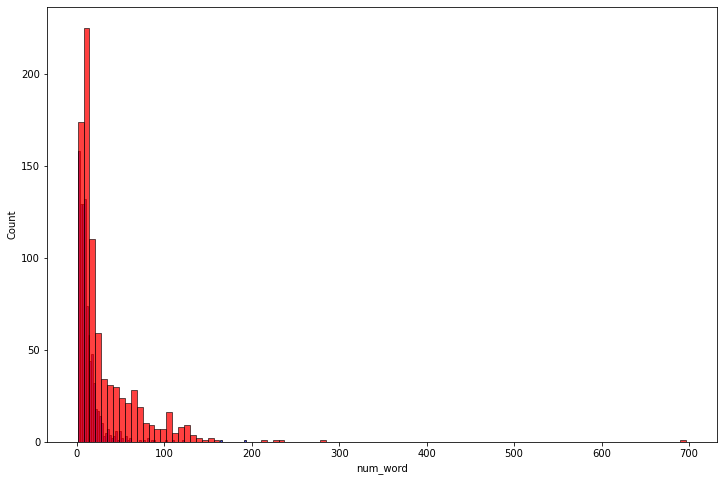

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['CLASS']==0]['num_word'],color='blue')
sns.histplot(df[df['CLASS']==1]['num_word'],color='red')

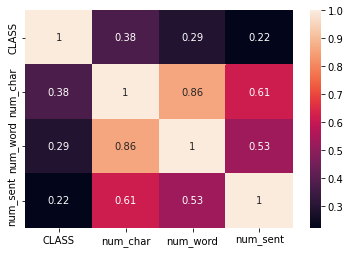

In [ ]:
 sns.heatmap(df.corr(),annot=True)

3. Data Preprocessing
1.   Lower case
2.   Tokenization
3.   Removing a special characters
4.  Removing special words and punctuation
5.   stemming
 





In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_CONTENT(CONTENT):
  CONTENT = CONTENT.lower()
  CONTENT = nltk.word_tokenize(CONTENT)

  y=[]
  for i in CONTENT:
    if i.isalnum():
      y.append(i)
  CONTENT=y[:]
  y.clear()

  for i in CONTENT:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  CONTENT=y[:]
  y.clear()

  for i in CONTENT:
    y.append(ps.stem(i))    
  return " ".join(y)

In [ ]:
transform_CONTENT('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [ ]:
 df['transformed_content']=df['CONTENT'].apply(transform_CONTENT)

In [ ]:
df.head()

,CONTENT,CLASS,num_char,num_word,num_sent,transformed_content
0,"Huh, anyway check out this you[tube] channel: ...",1,56,13,1,huh anyway check tube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,1,166,40,3,hey guy check new channel first vid us monkey ...
2,just for test I have to say murdev.com,1,38,8,1,test say
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,11,1,shake sexi ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,7,1,watch check


In [ ]:
pip install wordCloud

In [ ]:
from wordcloud import WordCloud
wc =  WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['CLASS']==1]['transformed_content'].str.cat(sep=" "))

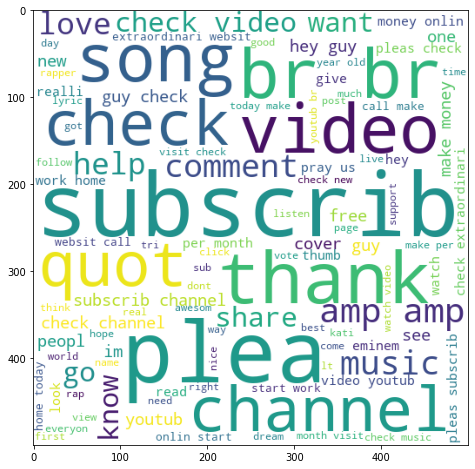

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['CLASS']==0]['transformed_content'].str.cat(sep=" "))

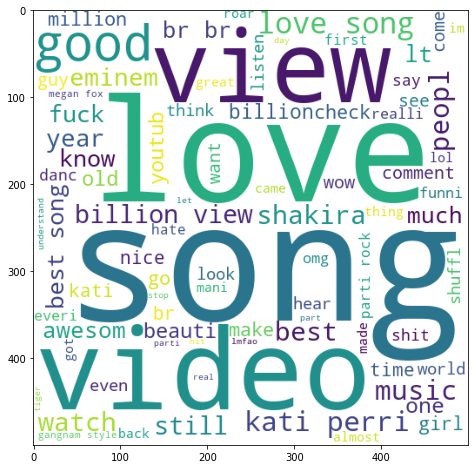

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df['CLASS']==1]['transformed_content'].tolist():
      for word in msg.split():
        spam_corpus.append(word)

In [ ]:
spam_corpus

['huh',
 'anyway',
 'check',
 'tube',
 'channel',
 'kobyoshi02',
 'hey',
 'guy',
 'check',
 'new',
 'channel',
 'first',
 'vid',
 'us',
 'monkey',
 'monkey',
 'white',
 'shirt',
 'pleas',
 'leav',
 'like',
 'comment',
 'pleas',
 'subscrib',
 'test',
 'say',
 'shake',
 'sexi',
 'ass',
 'channel',
 'enjoy',
 'watch',
 'check',
 'hey',
 'check',
 'new',
 'websit',
 'site',
 'kid',
 'stuff',
 'kidsmediausa',
 'com',
 'subscrib',
 'channel',
 'check',
 'channel',
 'funni',
 'video',
 'u',
 'check',
 'channel',
 'tell',
 'next',
 'hey',
 'subscrib',
 'start',
 'read',
 'stop',
 'subscrib',
 'within',
 'one',
 'day',
 'entir',
 'famili',
 'die',
 'want',
 'stay',
 'aliv',
 'subscrib',
 'right',
 'http',
 'subscrib',
 'like',
 'pleas',
 'like',
 'http',
 'hello',
 'like',
 'game',
 'art',
 'video',
 'scientif',
 'experi',
 'tutori',
 'lyric',
 'video',
 'much',
 'much',
 'pleas',
 'check',
 'channel',
 'subscrib',
 'start',
 'soon',
 'hope',
 'abl',
 'cover',
 'expect',
 'also',
 'check',
 'go

In [ ]:
pip install counter

  Created wheel for counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=ae7e5f511dcacbed97e8d852a14108599755c5cd2c5a5bdf963407e91e609c9a
  Stored in directory: /root/.cache/pip/wheels/f9/15/75/7a0462a00beb08e391f5da370ca409b56781d2501dba083fa3
Successfully built counter


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


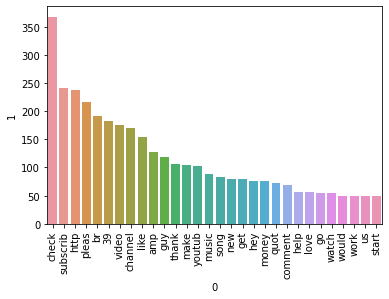

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['CLASS']==1]['transformed_content'].tolist():
      for word in msg.split():
        ham_corpus.append(word)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


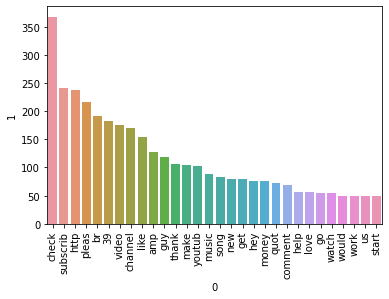

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

** Model Building

In [ ]:
#CountVectorizer - bag of words
#TfidfVectorizer - term frequency inverse document

from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['transformed_content']).toarray()

In [ ]:
X.shape

(1760, 2864)

In [ ]:
y = df['CLASS'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7017045454545454
[[148  34]
 [ 71  99]]
0.7443609022556391


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9090909090909091
[[171  11]
 [ 21 149]]
0.93125


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7954545454545454
[[178   4]
 [ 68 102]]
0.9622641509433962


In [ ]:
#all classification algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
 
train_classifier(rfc,X_train,y_train,X_test,y_test)

(0.9403409090909091, 0.9570552147239264)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.90625
Precision -  0.9477124183006536
For  KN
Accuracy -  0.6335227272727273
Precision -  0.9183673469387755
For  NB
Accuracy -  0.9090909090909091
Precision -  0.93125
For  DT
Accuracy -  0.9204545454545454
Precision -  0.9797297297297297
For  LR
Accuracy -  0.9176136363636364
Precision -  0.9607843137254902
For  RF
Accuracy -  0.9403409090909091
Precision -  0.9570552147239264
For  AdaBoost
Accuracy -  0.9346590909090909
Precision -  0.9401197604790419
For  BgC
Accuracy -  0.9431818181818182
Precision -  0.9411764705882353
For  ETC
Accuracy -  0.9318181818181818
Precision -  0.9397590361445783
For  GBDT
Accuracy -  0.9318181818181818
Precision -  0.9620253164556962
For  xgb
Accuracy -  0.9318181818181818
Precision -  0.9620253164556962


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,BgC,Accuracy,0.943182
1,RF,Accuracy,0.940341
2,AdaBoost,Accuracy,0.934659
3,ETC,Accuracy,0.931818
4,GBDT,Accuracy,0.931818
5,xgb,Accuracy,0.931818
6,LR,Accuracy,0.917614
7,DT,Accuracy,0.911932
8,NB,Accuracy,0.909091
9,SVC,Accuracy,0.906250


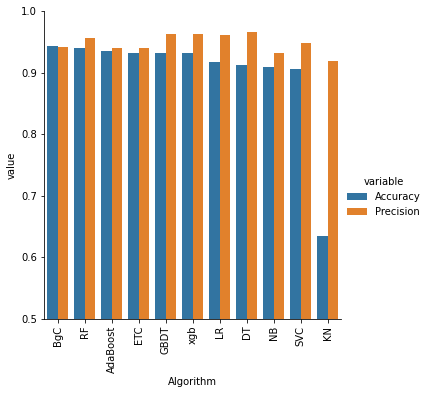

In [ ]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9431818181818182
Precision 0.9573170731707317


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9318181818181818
Precision 0.9345238095238095


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))

In [ ]:
pip install streamlit

     |████████████████████████████████| 10.1 MB 7.9 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 4.3 MB 49.2 MB/s 
     |████████████████████████████████| 111 kB 48.6 MB/s 
     |████████████████████████████████| 181 kB 33.2 MB/s 
     |████████████████████████████████| 164 kB 54.1 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 131 kB 45.2 MB/s 
     |████████████████████████████████| 428 kB 56.6 MB/s 
     |████████████████████████████████| 793 kB 54.5 MB/s 
     |████████████████████████████████| 130 kB 59.7 MB/s 
     |████████████████████████████████| 381 kB 50.0 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=6d82254a460688f471ee4e85392279ecb9878a43a2e4b99a62f5c4717dd865b2
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: 

In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_CONTENT(CONTENT):
  CONTENT = CONTENT.lower()
  CONTENT = nltk.word_tokenize(CONTENT)

  y=[]
  for i in CONTENT:
    if i.isalnum():
      y.append(i)
  CONTENT=y[:]
  y.clear()

  for i in CONTENT:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  CONTENT=y[:]
  y.clear()

  for i in CONTENT:
    y.append(ps.stem(i))    
  return " ".join(y)
 

tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

st.title("DETECTING YT COMMENT SPAM")

input_comment = st.text_area("Enter the Comment")

if st.button('Predict'):

    # 1. preprocess
    transformed_comment = transform_CONTENT(input_comment)
    # 2. vectorize
    vector_input = tfidf.transform([transformed_comment])
    # 3. predict
    result = model.predict(vector_input)[0]
    # 4. Display
    if result == 1:
        st.header("Spam 😒")
    else:
        st.header("Not Spam 😊")

Writing app.py


In [ ]:
!streamlit run app.py &npx localtunnel --port 8501

2022-04-26 05:10:17.519 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.71.32.198:8501

npx: installed 22 in 3.332s
your url is: https://slimy-mouse-13.loca.lt
